In [25]:
import pandas as pd
import numpy as np

pbp_data = pd.DataFrame()
years = range(2014, 2021)
for i in years:
    url = f"https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_{i}.parquet"
    print(f"Pulling url {url}")
    i_data = pd.read_parquet(url, engine='pyarrow')

    #sort=True eliminates a warning and alphabetically sorts columns
    pbp_data = pbp_data.append(i_data, sort=True)

#Give each row a unique index
pbp_data.reset_index(drop=True, inplace=True)
pbp_data.head()

Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2014.parquet
Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2015.parquet
Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2016.parquet
Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2017.parquet
Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2018.parquet
Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2019.parquet
Pulling url https://raw.githubusercontent.com/saiemgilani/cfbscrapR-data/master/data/parquet/pbp_players_pos_2020.parquet


,EPA,ExpScoreDiff,ExpScoreDiff_Time_Ratio,FG_after,FG_before,Goal_To_Go,Goal_To_Go_end,No_Score_after,No_Score_before,Opp_FG_after,...,yds_kickoff,yds_kickoff_return,yds_penalty,yds_punt_gained,yds_punt_return,yds_punted,yds_receiving,yds_rushed,yds_sacked,year
0,-0.565384,0.835848,0.000232,0.132497,0.170311,False,False,0.002218,0.001810,0.123708,...,64.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
1,-0.469578,0.270464,0.000075,0.120739,0.132497,False,False,0.002423,0.002218,0.134912,...,NaN,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
2,-0.484325,-0.488417,-0.000136,0.111865,0.139679,False,False,0.002728,0.002383,0.149630,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2014.0
3,-0.214516,-0.972742,-0.000273,0.093482,0.111865,False,False,0.002888,0.002728,0.155241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2014.0
4,2.529815,-1.187259,-0.000336,0.158063,0.093482,False,False,0.002756,0.002888,0.097974,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,2014.0


In [36]:
early_rush = pbp_data[
                        (pbp_data.down == 2) # change to <= for early downs
                      & (pbp_data.down > 0) 
                      & (pbp_data.distance >= 7) # comment out for early downs
                      & (pbp_data.wp_before >= 0.20)
                      & (pbp_data.wp_before <= 0.80)
                      & (pbp_data.half_play_number > 30) # neutral game script?
                     ]

early_rush.head()

,EPA,ExpScoreDiff,ExpScoreDiff_Time_Ratio,FG_after,FG_before,Goal_To_Go,Goal_To_Go_end,No_Score_after,No_Score_before,Opp_FG_after,...,yds_kickoff,yds_kickoff_return,yds_penalty,yds_punt_gained,yds_punt_return,yds_punted,yds_receiving,yds_rushed,yds_sacked,year
37,-0.557756,-4.815587,-0.001698,0.174596,0.186889,False,False,0.034174,0.028832,0.077807,...,NaN,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
38,-0.146644,-5.562323,-0.001975,0.190542,0.177796,False,False,0.039403,0.034791,0.081771,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2014.0
45,0.002317,6.736423,0.002494,0.102043,0.102174,False,False,0.079531,0.078393,0.124172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
46,-0.985344,6.738740,0.002499,0.072068,0.102043,False,False,0.079118,0.079531,0.145861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
51,-1.015121,-4.442430,-0.001731,0.201113,0.189612,False,False,0.083976,0.071651,0.069481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0


In [37]:
from numpy.core.fromnumeric import mean
team_early_rush = early_rush.groupby(by=["pos_team", "year"], as_index=False).agg(
    early_rush_rate = ("rush", mean),
    avgEPA = ("EPA", mean)
)
team_early_rush

,pos_team,year,early_rush_rate,avgEPA
0,Abilene Christian,2014.0,0.214286,0.054035
1,Abilene Christian,2015.0,1.000000,-0.596664
2,Abilene Christian,2016.0,0.285714,0.101451
3,Abilene Christian,2017.0,0.200000,-0.246311
4,Abilene Christian,2019.0,0.000000,-0.565962
...,...,...,...,...
1220,Wyoming,2020.0,0.500000,-0.147096
1221,Yale,2014.0,0.300000,0.200276
1222,Youngstown State,2014.0,0.727273,0.121460
1223,Youngstown State,2015.0,0.000000,-0.004012


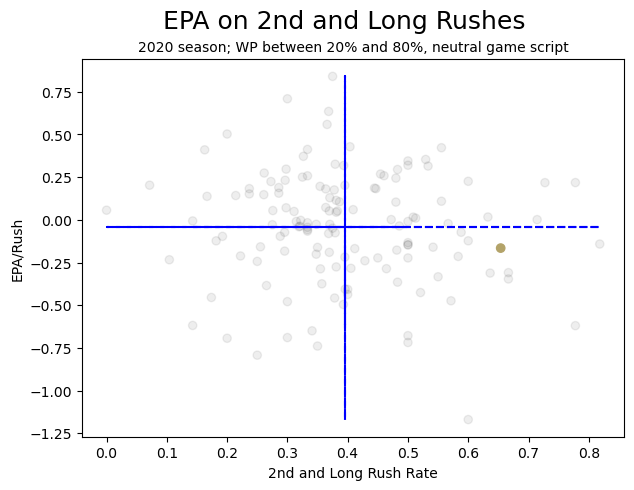

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

team_early_rush["color"] = np.where(
    team_early_rush.pos_team.str.contains("Georgia Tech"),
    "#B3A369FF",
    "#00000011"
)

selected_year = 2020
selected_data = team_early_rush[(team_early_rush.year == selected_year)]

fig, ax1 = plt.subplots()

ax1.set_ylabel("EPA/Rush")
ax1.set_xlabel("2nd and Long Rush Rate")
ax1.scatter(selected_data.early_rush_rate, selected_data.avgEPA, c = selected_data.color)
plt.suptitle("EPA on 2nd and Long Rushes", fontsize=18)
plt.title(f"{selected_year} season; WP between 20% and 80%, neutral game script", fontsize=10)

y_mean = [np.mean(selected_data.avgEPA)] * len(selected_data.early_rush_rate)
x_mean = [np.mean(selected_data.early_rush_rate)] * len(selected_data.avgEPA)

y_mean_line = ax1.plot(selected_data.early_rush_rate, y_mean, linestyle='--', color="blue")
x_mean_line = ax1.plot(x_mean, selected_data.avgEPA, linestyle='--', color="blue")

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show();